<a href="https://colab.research.google.com/github/vdadithya2002/ImageFusion/blob/main/ImageFusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Fusion for Change Detection Using Machine Learning

#Step 1 :- Uploading Two Satellite Images

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Vishakhapatnam Port(after).png to Vishakhapatnam Port(after) (1).png
Saving Vishakhapatnam Port(before).png to Vishakhapatnam Port(before) (1).png


In [ ]:
import cv2
import numpy as np # Import numpy

# Assuming you have already run the file upload cell

img1_path = "Vishakhapatnam Port(before) (1).png"
img2_path = "Vishakhapatnam Port(after) (1).png"

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Check if images were loaded successfully
if img1 is None:
    print(f"Error: Could not load image from {img1_path}. Please check the file name and path.")
if img2 is None:
    print(f"Error: Could not load image from {img2_path}. Please check the file name and path.")

# Only proceed with resizing if both images were loaded
if img1 is not None and img2 is not None:
    img1 = cv2.resize(img1, (256,256))
    img2 = cv2.resize(img2, (256,256))
    print("Images loaded and resized successfully.")

Images loaded and resized successfully.


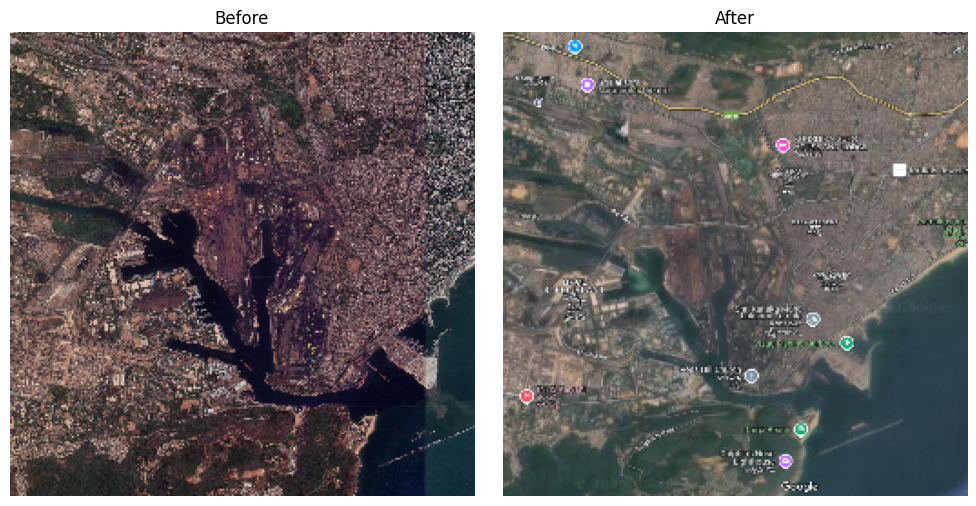

In [ ]:
import matplotlib.pyplot as plt

def show_images(img1, img2, title1="Before", title2="After"):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')

  plt.tight_layout()
  plt.show()

show_images(img1, img2)

#Step 2: Image Fusion Using PCA(Principal component Analysis)

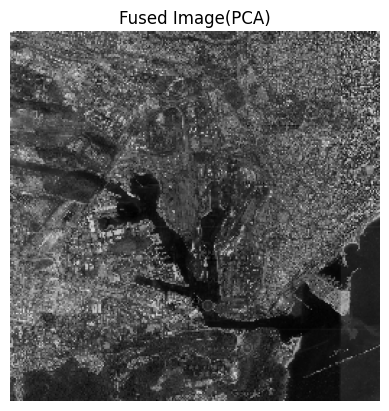

In [ ]:
from sklearn.decomposition import PCA
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pca_image_fusion(img1, img2):
  gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  stacked = np.stack((gray1, gray2), axis=-1)
  shape = stacked.shape
  flat = stacked.reshape(-1,2)

  pca = PCA(n_components=1)
  fused_flat = pca.fit_transform(flat)


  fused = fused_flat.reshape(shape[0], shape[1])
  fused = cv2.normalize(fused, None, 0, 255, cv2.NORM_MINMAX)
  fused = fused.astype(np.uint8)

  return fused

fused_img = pca_image_fusion(img1, img2)

plt.imshow(fused_img, cmap='gray')
plt.title("Fused Image(PCA)")
plt.axis('off')
plt.show()


#Step 3: Change Detection using Subtraction + Thresholding

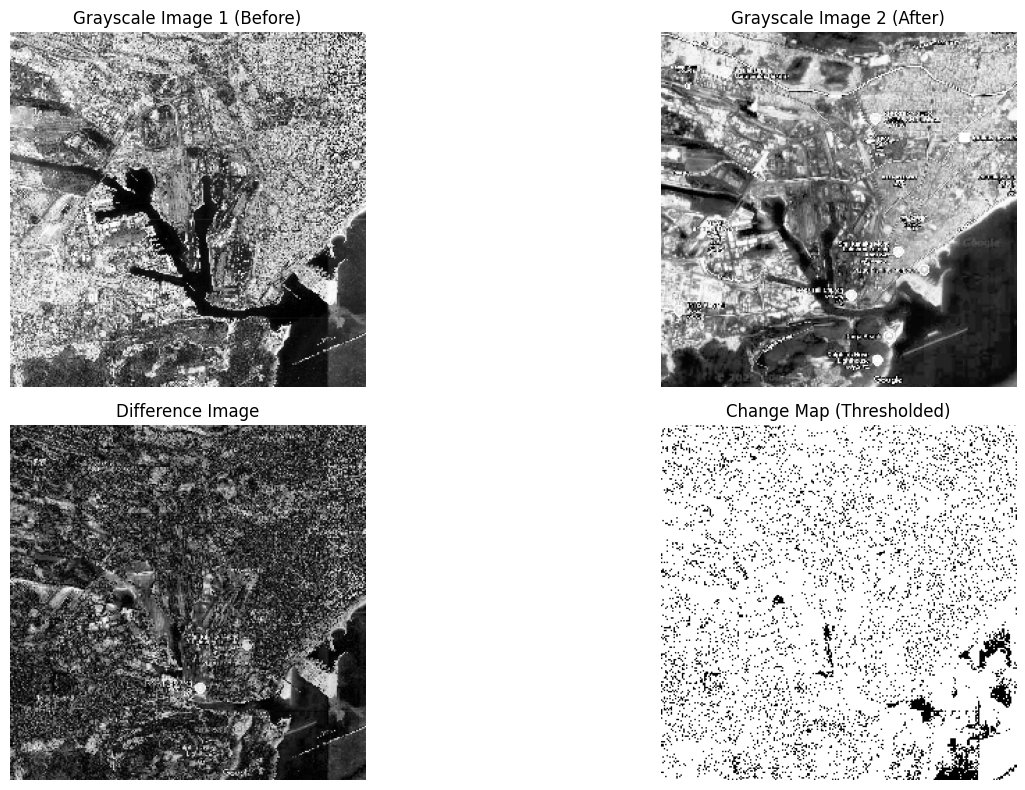

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eq = cv2.equalizeHist(gray)
    return eq

def detect_changes(img1, img2, threshold=10):
    img1_eq = preprocess_image(img1)
    img2_eq = preprocess_image(img2)

    diff = cv2.absdiff(img1_eq, img2_eq)

    _, change_map = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    return img1_eq, img2_eq, diff, change_map

gray1, gray2, diff_img, change_map = detect_changes(img1, img2)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.title("Grayscale Image 1 (Before)")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title("Grayscale Image 2 (After)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(diff_img, cmap='gray')
plt.title("Difference Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(change_map, cmap='gray')
plt.title("Change Map (Thresholded)")
plt.axis("off")

plt.tight_layout()
plt.show()


#Analysis of Your Output:
Output
What It Shows

Grayscale Image 1 (Before) :-	Histogram-equalized version of the satellite image before changes.

Grayscale Image 2 (After) :- 	Enhanced version of the updated satellite image.

Difference Image :-	Pixel-level intensity difference — brighter areas = more difference.

Change Map (Thresholded) :-	Clear binary map showing only significant changes — these are your detected change zones! ✅